### Limpieza de datos

In [6]:
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters
import plotly.graph_objects as go
from gtda.plotting import plot_point_cloud


### Verificaciones

In [7]:
import pandas as pd
# Lee el archivo CSV especificando el delimitador y la columna de fechas
df = pd.read_csv('archivo_dividido.csv', delimiter=',', parse_dates=['Date'])

# Verifica que cada año avance coherentemente
def verificar_orden(dataframe):
    years = dataframe['Date'].dt.year.tolist()
    sorted_years = sorted(years)
    if years == sorted_years:
        print("Los años avanzan coherentemente en orden ascendente.")
    else:
        print("¡Error! Los años no avanzan coherentemente.")

verificar_orden(df)
df.head()

Los años avanzan coherentemente en orden ascendente.


,Date,January,February,March,April,May,June,July,August,September,October,November,December
0,1870-01-01,-1.00,-1.20,-0.83,-0.81,-1.27,-1.08,-1.04,-0.88,-0.53,-0.92,-0.79,-0.79
1,1871-01-01,-0.25,-0.58,-0.43,-0.50,-0.70,-0.53,-0.60,-0.33,-0.24,-0.33,-0.31,-0.58
2,1872-01-01,-0.72,-0.62,-0.50,-0.77,-0.62,-0.52,-0.32,-0.85,-1.02,-0.94,-0.79,-0.88
3,1873-01-01,-0.78,-1.01,-1.31,-0.67,-0.53,-0.48,-0.58,-0.39,-0.34,-0.78,-0.77,-0.70
4,1874-01-01,-0.93,-1.06,-1.40,-0.94,-0.86,-0.72,-1.00,-1.05,-1.13,-1.25,-1.33,-1.14


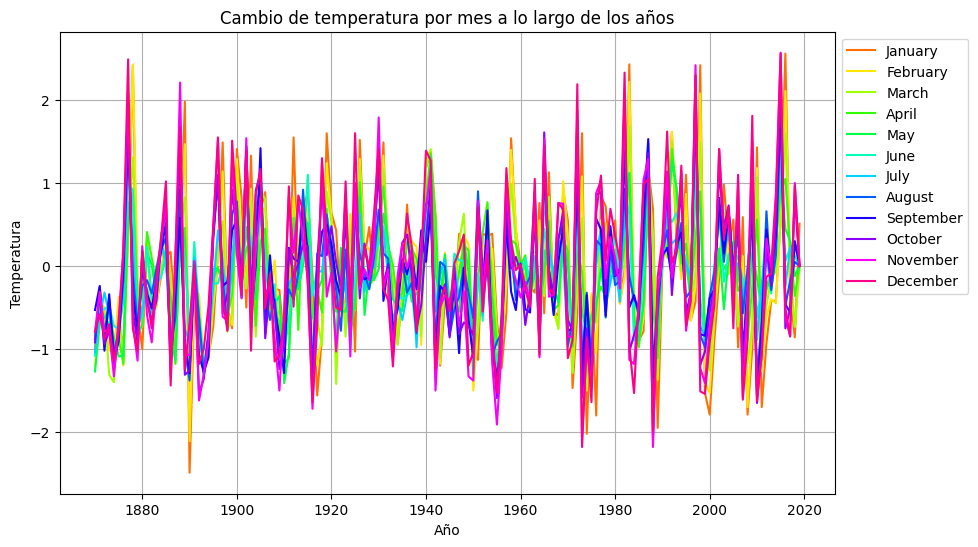

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una gráfica para mostrar el cambio de temperatura para cada mes a lo largo de todos los años
plt.figure(figsize=(10, 6))

# Conjunto para almacenar etiquetas únicas
used_labels = set()

# Definir una paleta de colores categóricos
palette = sns.color_palette("hsv", len(df.columns[1:]))

# Iterar sobre los meses y las columnas de temperatura
for month in range(1, 13):
    # Filtrar los datos para el mes actual
    month_data = df[df['Date'].dt.month == month]
    # Obtener la cantidad de datos para este mes
    num_data_points = month_data.shape[0]
    # Iterar sobre las columnas de temperatura y graficarlas si hay datos suficientes
    for i, col in enumerate(df.columns[1:]):
        # Verificar si la etiqueta ya se ha usado y si hay suficientes datos para graficar
        if col not in used_labels and num_data_points > 0:
            plt.plot(month_data['Date'], month_data[col], label=col, color=palette[i])
            used_labels.add(col)  # Agregar la etiqueta al conjunto de etiquetas usadas
    
# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.title('Cambio de temperatura por mes a lo largo de los años')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


In [14]:


def takens_embedding(series, delay, dimension):
    """
    series: Serie temporal original
    delay: Retraso para el encaje
    dimension: Dimensión del encaje
    """
    # Convertir la serie temporal en un array de numpy
    data = np.array(series).reshape(-1, 1)
    
    # Aplicar el encaje de Takens con Giotto-TDA
    embedding = SingleTakensEmbedding(time_delay=delay, dimension=dimension)
    embedded_series = embedding.fit_transform(data)
    
    # Convertir el resultado de vuelta a un DataFrame de pandas
    embedded_df = pd.DataFrame(embedded_series, columns=[f'X(t-{i * delay})' for i in range(0, dimension)])
    return embedded_df






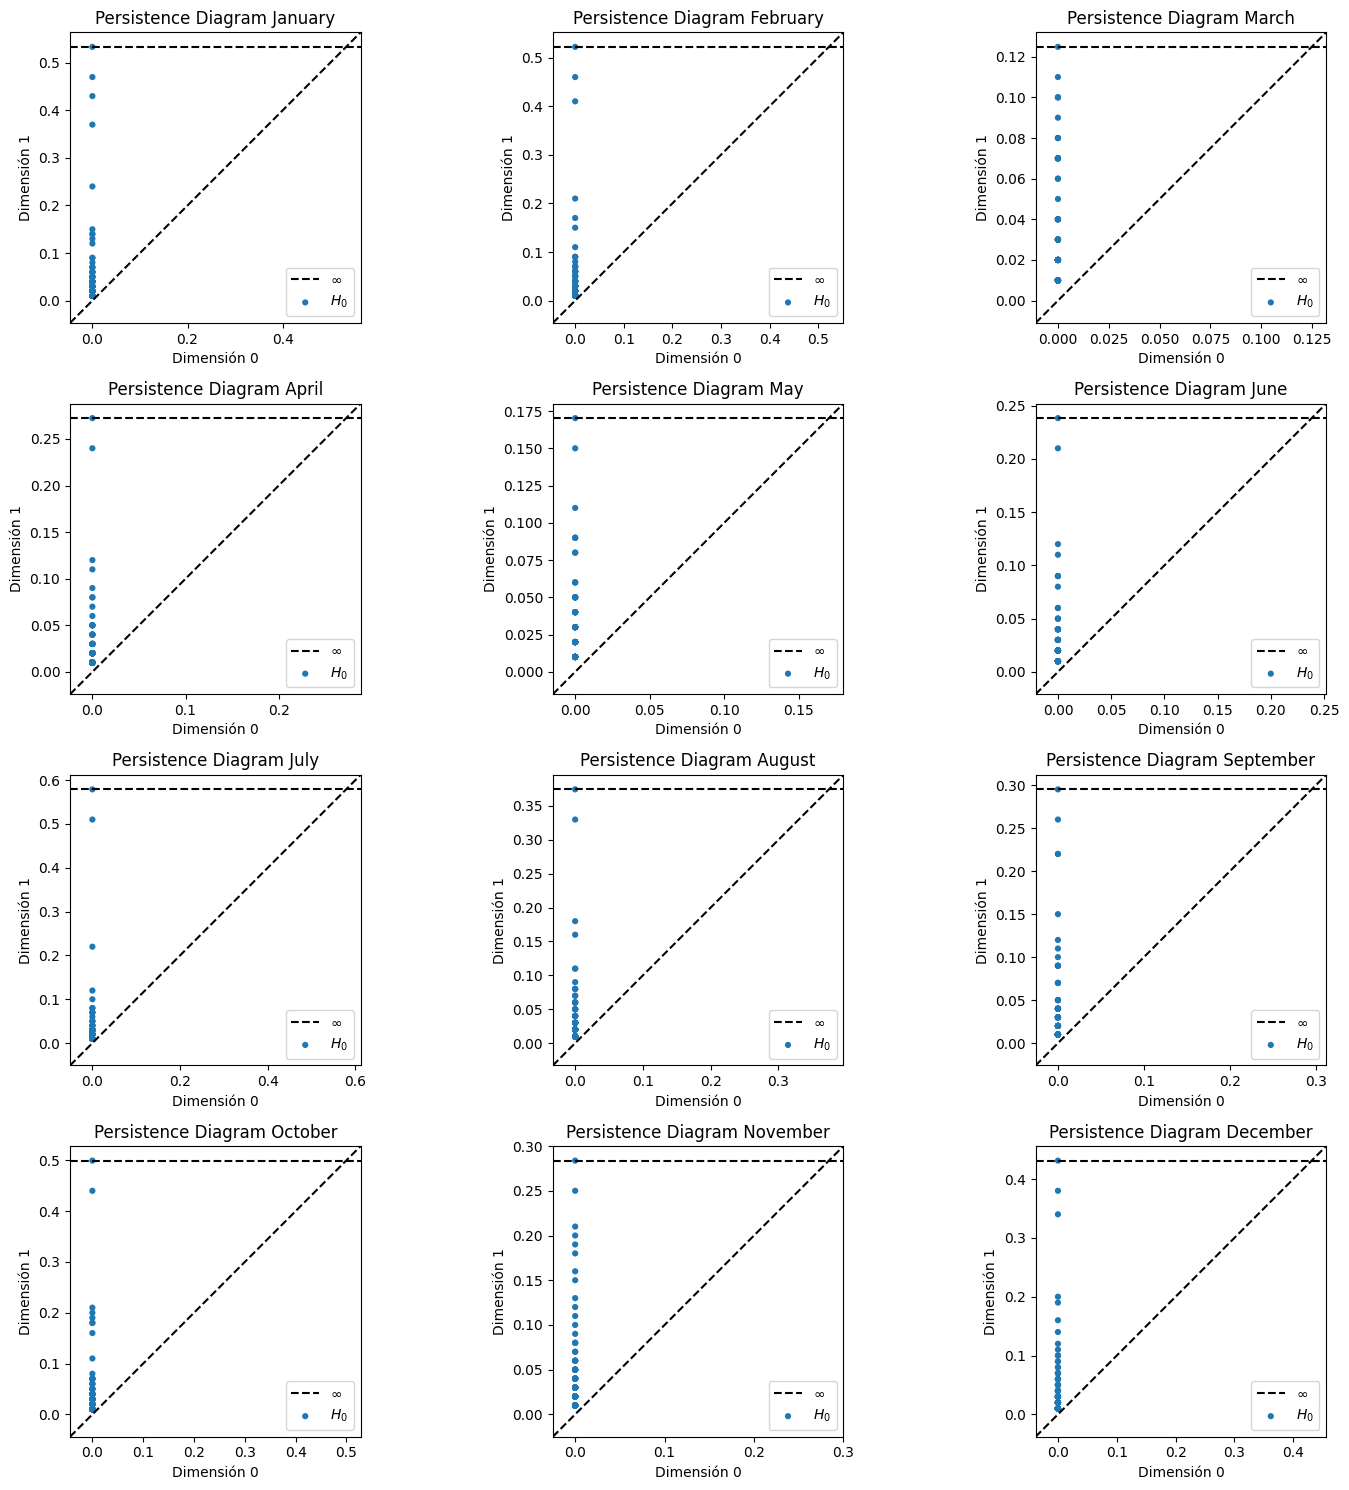

In [10]:
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
def persistence_model(data, month_name, ax):
    """
    data: Conjunto de datos
    month_name: Nombre del mes
    ax: Eje para agregar el diagrama de persistencia
    """
    # Convertir el conjunto de datos en un array de numpy
    data_array = np.array(data).reshape(-1, 1)
    
    # Calcular el diagrama de persistencia con Ripser
    diagram = ripser(data_array)['dgms'][0]
    
    # Visualizar el diagrama de persistencia con Persim
    plot_diagrams(diagram, ax=ax)
    
    # Añadir título y etiqueta para el mes
    ax.set_title(f'Persistence Diagram {month_name}')
    ax.set_xlabel('Dimensión 0')
    ax.set_ylabel('Dimensión 1')

# Obtener la serie de tiempo de todos los meses
datos = df

# Crear subplots para cada columna de datos
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Calcular la persistencia y visualizar en subplots para cada columna de datos
for i, column in enumerate(datos.columns[1:]):
    row = i // 3
    col = i % 3
    persistence_model(datos[column], column, ax=axes[row, col])

# Ajustar el diseño y mostrar los subplots
plt.tight_layout()
plt.show()


In [11]:
# Obtener la serie de tiempo de todos los meses
for i in df.columns[1:]:
    datos = df[i]

# Aplicar el encaje de Takens
embedded_series = takens_embedding(datos, delay=1, dimension=2)


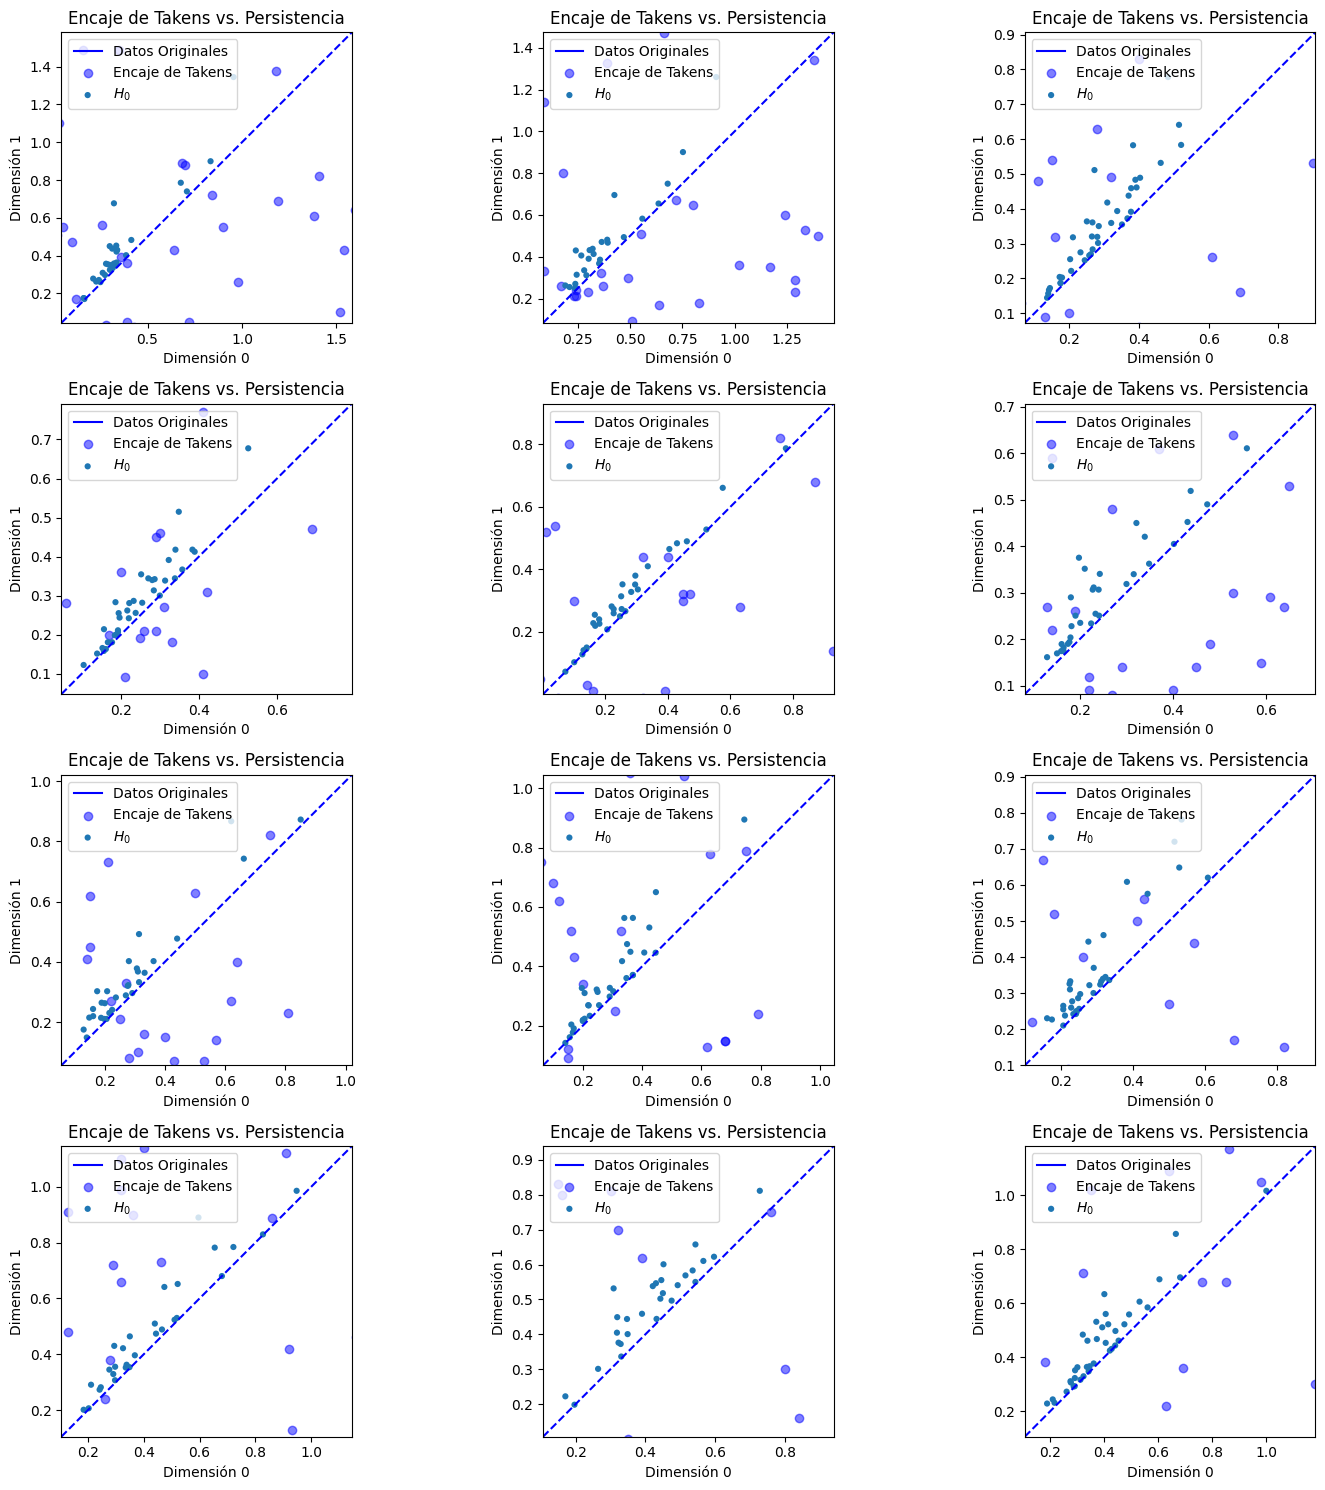

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from gtda.time_series import SingleTakensEmbedding
from ripser import ripser
from persim import plot_diagrams
from gtda.plotting import plot_point_cloud

def plot_takens_vs_persistence_subplot(takens_data, persistence_data, original_data, ax, color):
    """
    takens_data: Datos de encaje de Takens
    persistence_data: Diagrama de persistencia
    original_data: Datos originales
    ax: Eje para agregar el subplot
    color: Color para los puntos de encaje de Takens y los diagramas de persistencia
    """
    # Graficar los datos originales
    ax.plot(original_data.index, original_data.values, color=color, label='Datos Originales')
    
    # Graficar el encaje de Takens
    ax.scatter(takens_data[:, 0], takens_data[:, 1], color=color, alpha=0.5, label='Encaje de Takens')
    
    # Configurar el color del diagrama de persistencia
    plot_diagrams(persistence_data, ax=ax, legend=False, size=20)
    ax.get_lines()[-1].set_color(color)
    
    # Configurar título y etiquetas
    ax.set_title('Encaje de Takens vs. Persistencia')
    ax.set_xlabel('Dimensión 0')
    ax.set_ylabel('Dimensión 1')
    ax.legend(loc='upper left')


# Obtener la serie de tiempo de todas las columnas excepto 'Date'
datos = df.drop(columns=['Date'])

# Determinar el número de filas y columnas para la cuadrícula de gráficas
nrows = 4  # Número de filas
ncols = 3  # Número de columnas

# Crear subgráficos en una cuadrícula
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

# Aplanar los subgráficos para facilitar la iteración
axes = axes.flatten()

# Aplicar el encaje de Takens y el modelo de persistencia para cada columna y visualizar en subgráficos
for i, column in enumerate(datos.columns):
    takens_data = takens_embedding(datos[column], delay=1, dimension=2).values  # Aquí se ajusta la dimensión a 2
    persistence_data = ripser(takens_data)['dgms'][1]  # Calculamos el diagrama de persistencia para la dimensión 1
    plot_takens_vs_persistence_subplot(takens_data, persistence_data, datos[column], axes[i], color='blue')

# Ocultar los subgráficos que no se utilizarán
for j in range(nrows * ncols):
    if j >= len(datos.columns):
        axes[j].axis('off')

plt.tight_layout()
plt.show()


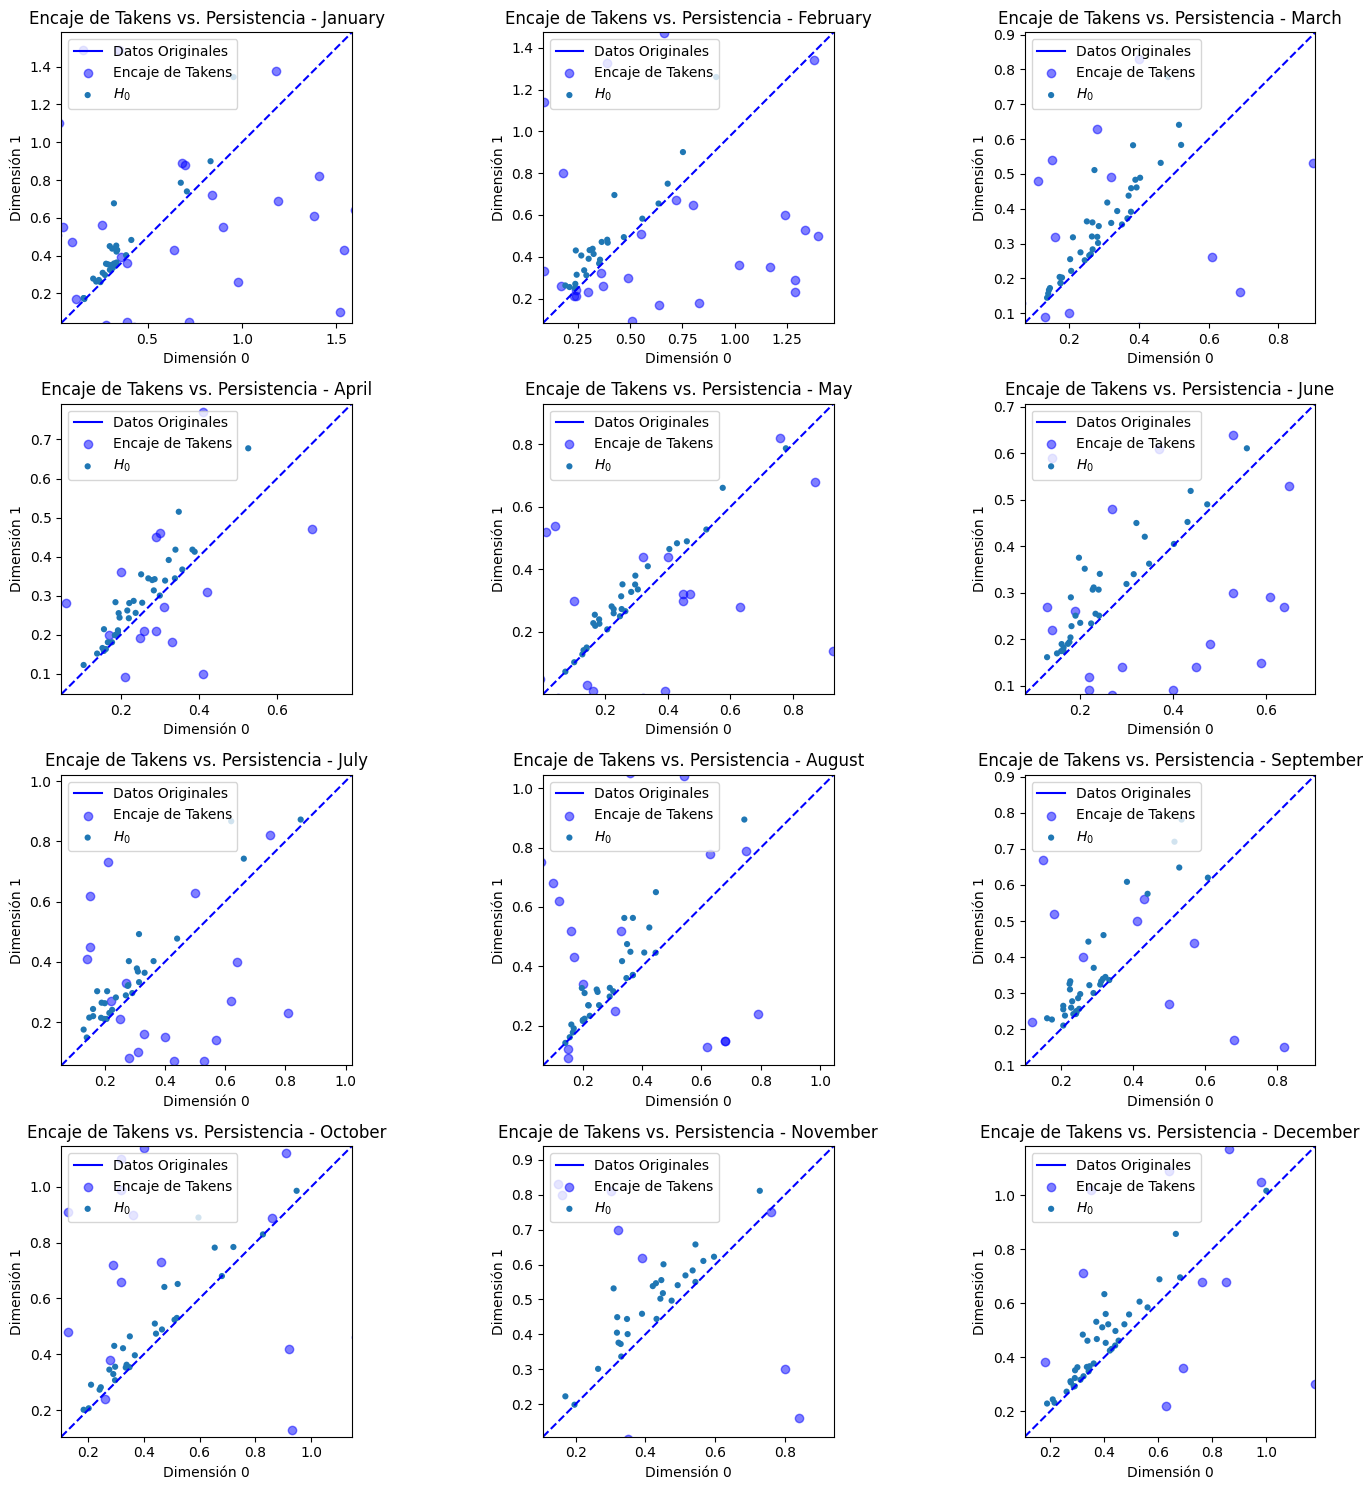

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from gtda.time_series import SingleTakensEmbedding
from ripser import ripser
from persim import plot_diagrams
from gtda.plotting import plot_point_cloud

def plot_takens_vs_persistence_subplot(takens_data, persistence_data, original_data, ax, color, month_name):
    """
    takens_data: Datos de encaje de Takens
    persistence_data: Diagrama de persistencia
    original_data: Datos originales
    ax: Eje para agregar el subplot
    color: Color para los puntos de encaje de Takens y los diagramas de persistencia
    month_name: Nombre del mes
    """
    # Graficar los datos originales
    ax.plot(original_data.index, original_data.values, color=color, label='Datos Originales')
    
    # Graficar el encaje de Takens
    ax.scatter(takens_data[:, 0], takens_data[:, 1], color=color, alpha=0.5, label='Encaje de Takens')
    
    # Configurar el color del diagrama de persistencia
    plot_diagrams(persistence_data, ax=ax, legend=False, size=20)
    ax.get_lines()[-1].set_color(color)
    
    # Configurar título y etiquetas
    ax.set_title(f'Encaje de Takens vs. Persistencia - {month_name}')
    ax.set_xlabel('Dimensión 0')
    ax.set_ylabel('Dimensión 1')
    ax.legend(loc='upper left')

# Obtener la serie de tiempo de todas las columnas excepto 'Date'
datos = df.drop(columns=['Date'])

# Determinar el número de filas y columnas para la cuadrícula de gráficas
nrows = 4  # Número de filas
ncols = 3  # Número de columnas

# Crear subgráficos en una cuadrícula
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

# Aplanar los subgráficos para facilitar la iteración
axes = axes.flatten()

# Lista de nombres de los meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Aplicar el encaje de Takens y el modelo de persistencia para cada columna y visualizar en subgráficos
for i, column in enumerate(datos.columns):
    takens_data = takens_embedding(datos[column], delay=1, dimension=2).values  # Aquí se ajusta la dimensión a 2
    persistence_data = ripser(takens_data)['dgms'][1]  # Calculamos el diagrama de persistencia para la dimensión 1
    plot_takens_vs_persistence_subplot(takens_data, persistence_data, datos[column], axes[i], color='blue', month_name=df.columns[1+i])

# Ocultar los subgráficos que no se utilizarán
for j in range(nrows * ncols):
    if j >= len(datos.columns):
        axes[j].axis('off')

plt.tight_layout()
plt.show()
